In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads\loan.csv')
df.shape

(163987, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

<AxesSubplot:xlabel='bad_loan', ylabel='count'>

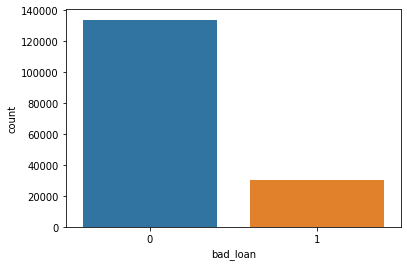

In [5]:
sns.countplot(x='bad_loan',data=df)

<AxesSubplot:>

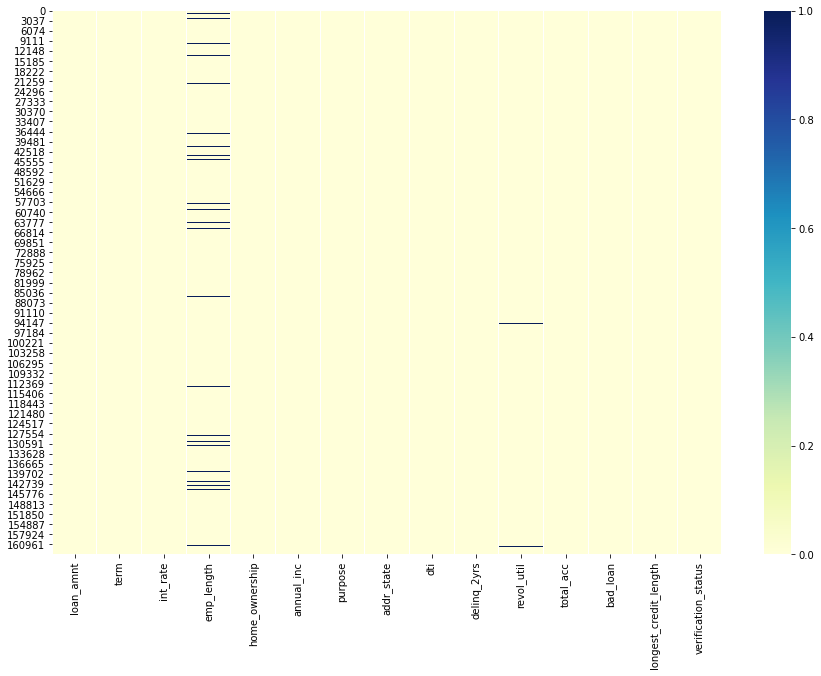

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap = "YlGnBu")

In [7]:
df.drop(['purpose','addr_state'],axis=1,inplace=True)

In [8]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [9]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [10]:
df['verification_status'].unique()

array(['verified', 'not verified'], dtype=object)

In [11]:
term=pd.get_dummies(df['term'],drop_first=True)
home_ownership=pd.get_dummies(df['home_ownership'],drop_first=True)
verification_status=pd.get_dummies(df['verification_status'],drop_first=True)

In [12]:
df1=pd.concat([df,term,verification_status,home_ownership],axis=1)

In [13]:
df1.drop(['term','verification_status','home_ownership'],axis=1,inplace=True)

In [14]:
df1['emp_length'].fillna(df1['emp_length'].mean(),inplace=True)
df1['annual_inc'].fillna(df1['annual_inc'].mean(),inplace=True)
df1['delinq_2yrs'].fillna(df1['delinq_2yrs'].mean(),inplace=True)
df1['revol_util'].fillna(df1['revol_util'].mean(),inplace=True)
df1['total_acc'].fillna(df1['total_acc'].mean(),inplace=True)
df1['longest_credit_length'].fillna(df1['longest_credit_length'].mean(),inplace=True)

In [15]:
df1.isnull().sum()

loan_amnt                0
int_rate                 0
emp_length               0
annual_inc               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
60 months                0
verified                 0
MORTGAGE                 0
NONE                     0
OTHER                    0
OWN                      0
RENT                     0
dtype: int64

In [16]:
x=df1.drop('bad_loan',axis=1)
y=df1[['bad_loan']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=dec_tree.predict(x_test)
y_pred_train=dec_tree.predict(x_train)

In [20]:
confusion_matrix(y_test,y_pred)   #for testing dataset

array([[21789,  5063],
       [ 4303,  1643]], dtype=int64)

In [21]:
confusion_matrix(y_train,y_pred_train)  #for training datset

array([[107119,      0],
       [     0,  24070]], dtype=int64)

In [22]:
cls_report_test=classification_report(y_test,y_pred)    #for testing dataset
print(cls_report_test)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     26852
           1       0.25      0.28      0.26      5946

    accuracy                           0.71     32798
   macro avg       0.54      0.54      0.54     32798
weighted avg       0.73      0.71      0.72     32798



In [23]:
accuracy_score(y_test,y_pred)    #for testing dataset

0.7144338069394476

In [24]:
accuracy_score(y_train,y_pred_train)     #for training datset

1.0

# Using hyperparameter tuning

In [25]:
dt=DecisionTreeClassifier()
hyp={'criterion':['entropy','gini'],'max_depth':list(range(2,10,2))}
rmsv=RandomizedSearchCV(dt,hyp,cv=5)
best_model_dec_tree=rmsv.fit(x_train,y_train)
best_model_dec_tree.best_params_

{'max_depth': 2, 'criterion': 'entropy'}

In [26]:
y_pred_train2=best_model_dec_tree.predict(x_train)

In [27]:
y_pred2=best_model_dec_tree.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred2)   #for testing data.

0.8187084578327947

In [29]:
accuracy_score(y_train,y_pred_train2)  #for training data set

0.816524251271067

In [31]:
import pickle
pickle.dump(best_model_dec_tree,open('best_model_dec_tree.pickle','wb'))